In [3]:
import pandas as pd
from datetime import datetime, date

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")
from math import cos, asin, sqrt, pi


import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')
df.dtypes
df

NameError: name 'pd' is not defined

In [88]:
df['Timestamp'] = pd.to_datetime(df.Timestamp, infer_datetime_format=True)
df = df.set_index('Timestamp')


In [89]:
df['Hour'] = df.index.hour
df
hours = df.Hour.unique()
hours

array([20, 22,  5,  4, 23,  3,  0, 21,  1,  2])

In [92]:
df['Is_Weekend'] = df.index.weekday
df['Is_Weekday'] = df.index.weekday
df['Is_Weekend'] = df.Is_Weekend.replace([1,2,3,4], 0)
df['Is_Weekend'] = df.Is_Weekend.replace([5,6], 1)
df['Is_Weekday'] = df.Is_Weekday.replace([0,1,2,3,4], 1)
df['Is_Weekday'] = df.Is_Weekday.replace([5,6], 0)
df

,ID,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Hour,November,December,Is_Weekend,Is_Weekday
Timestamp,,,,,,,,,,,,
2019-12-04 20:01:50,000FLWA8,3.258,36.777,3.003,36.718,39627,2784,20,0,1,0,1
2019-12-10 22:37:09,000RGOAM,3.087,36.707,3.081,36.727,3918,576,22,0,1,0,1
2019-11-23 20:36:10,001QSGIH,3.144,36.739,3.088,36.742,7265,526,20,1,0,1,0
2019-12-01 05:43:21,002ACV6R,3.239,36.784,3.054,36.763,23350,3130,5,0,1,1,0
2019-12-17 20:30:20,0039Y7A8,2.912,36.707,3.207,36.698,36613,2138,20,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 23:21:58,ZZXN4JH2,3.121,36.743,3.032,36.770,10321,664,23,1,0,1,0
2019-11-27 05:59:31,ZZXQ5AQJ,3.024,36.749,2.951,36.735,10791,1056,5,1,0,0,1
2019-12-06 05:04:06,ZZXYPKGU,3.189,36.721,3.186,36.721,1139,296,5,0,1,0,1


Empty DataFrame
Columns: [ID, Origin_lat, Origin_lon, Destination_lat, Destination_lon, Trip_distance, ETA, Hour, Is_Weekend, Is_Weekday]
Index: []
(83924, 10)


DatetimeIndex(['2019-12-04 20:01:50', '2019-12-10 22:37:09',
               '2019-11-23 20:36:10', '2019-12-01 05:43:21',
               '2019-12-17 20:30:20', '2019-12-01 04:21:03',
               '2019-12-10 23:08:35', '2019-11-26 20:41:42',
               '2019-12-02 05:24:25', '2019-12-05 23:10:00',
               ...
               '2019-11-29 22:55:56', '2019-12-13 22:18:06',
               '2019-12-14 21:19:56', '2019-12-06 20:49:50',
               '2019-11-22 00:28:19', '2019-11-30 23:21:58',
               '2019-11-27 05:59:31', '2019-12-06 05:04:06',
               '2019-12-07 05:55:22', '2019-12-12 21:22:31'],
              dtype='datetime64[ns]', name='Timestamp', length=78046, freq=None)

In [93]:
df['November'] = df.index.month
df['December'] = df.index.month
df['November'] = df.November.replace({11:1, 12:0})
df['December'] = df.December.replace({11:0, 12: 1})
df

,ID,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Hour,November,December,Is_Weekend,Is_Weekday
Timestamp,,,,,,,,,,,,
2019-12-04 20:01:50,000FLWA8,3.258,36.777,3.003,36.718,39627,2784,20,0,1,0,1
2019-12-10 22:37:09,000RGOAM,3.087,36.707,3.081,36.727,3918,576,22,0,1,0,1
2019-11-23 20:36:10,001QSGIH,3.144,36.739,3.088,36.742,7265,526,20,1,0,1,0
2019-12-01 05:43:21,002ACV6R,3.239,36.784,3.054,36.763,23350,3130,5,0,1,1,0
2019-12-17 20:30:20,0039Y7A8,2.912,36.707,3.207,36.698,36613,2138,20,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 23:21:58,ZZXN4JH2,3.121,36.743,3.032,36.770,10321,664,23,1,0,1,0
2019-11-27 05:59:31,ZZXQ5AQJ,3.024,36.749,2.951,36.735,10791,1056,5,1,0,0,1
2019-12-06 05:04:06,ZZXYPKGU,3.189,36.721,3.186,36.721,1139,296,5,0,1,0,1


In [1]:
df['Night'] = df.Hour
df['Morning'] = df.Hour
df['Night'] = df.Night.replace([0,1,2,3,4,5], 0)
df['Night'] = df.Night.replace([20,21,22,23], 1)
df['Morning'] = df.Morning.replace([0,1,2,3,4,5], 1)
df['Morning'] = df.Morning.replace([20,21,22,23], 0)
df.Hour.unique()

NameError: name 'df' is not defined

,ID,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Hour,November,December,Is_Weekend,Is_Weekday,Night,Morning,Year
Timestamp,,,,,,,,,,,,,,,
2019-12-04 20:01:50,000FLWA8,3.258,36.777,3.003,36.718,39627,2784,20,0,1,0,1,1,0,2019
2019-12-10 22:37:09,000RGOAM,3.087,36.707,3.081,36.727,3918,576,22,0,1,0,1,1,0,2019
2019-11-23 20:36:10,001QSGIH,3.144,36.739,3.088,36.742,7265,526,20,1,0,1,0,1,0,2019
2019-12-01 05:43:21,002ACV6R,3.239,36.784,3.054,36.763,23350,3130,5,0,1,1,0,0,1,2019
2019-12-17 20:30:20,0039Y7A8,2.912,36.707,3.207,36.698,36613,2138,20,0,1,0,1,1,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 23:21:58,ZZXN4JH2,3.121,36.743,3.032,36.770,10321,664,23,1,0,1,0,1,0,2019
2019-11-27 05:59:31,ZZXQ5AQJ,3.024,36.749,2.951,36.735,10791,1056,5,1,0,0,1,0,1,2019
2019-12-06 05:04:06,ZZXYPKGU,3.189,36.721,3.186,36.721,1139,296,5,0,1,0,1,0,1,2019


<AxesSubplot:>

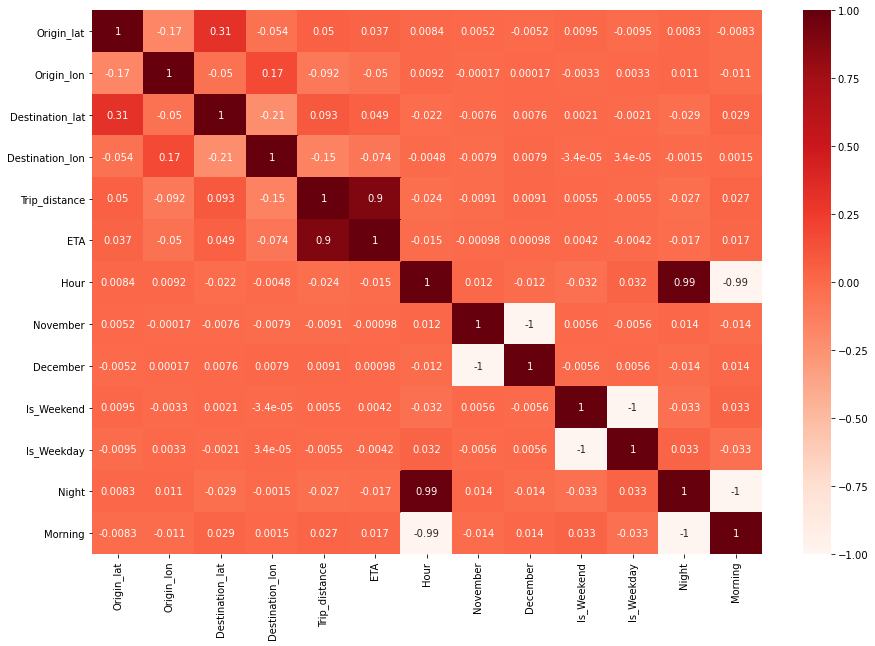

In [103]:
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

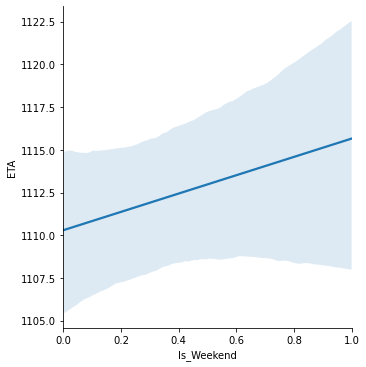

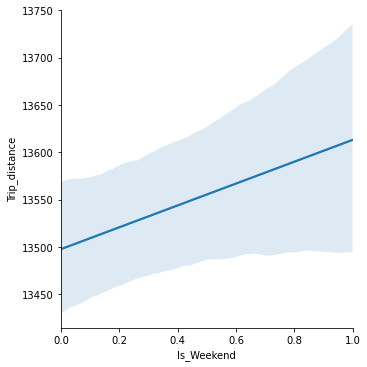

In [122]:
sns.lmplot(data=df, x='Is_Weekend', y='ETA', scatter = False)
sns.lmplot(data=df, x='Is_Weekend', y='Trip_distance', scatter = False)

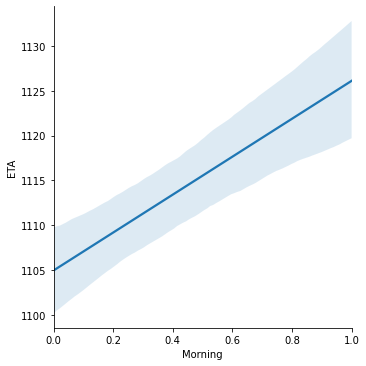

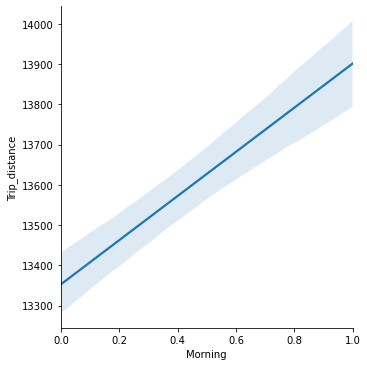

In [124]:
sns.lmplot(data=df, x='Morning', y='ETA', scatter=False)
sns.lmplot(data=df, x='Morning', y='Trip_distance', scatter = False)

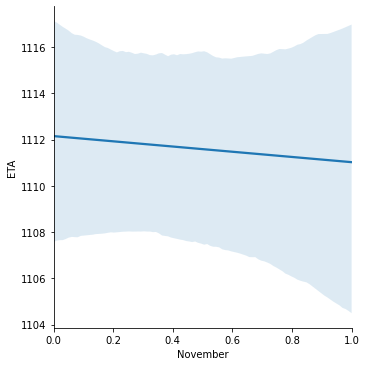

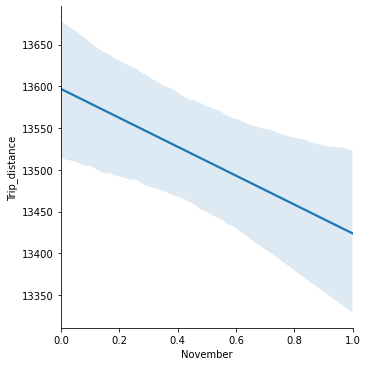

In [126]:
sns.lmplot(data=df, x='November', y='ETA', scatter = False)
sns.lmplot(data=df, x='November', y='Trip_distance', scatter = False)